In [ ]:
import numpy as np
import tensorflow as tf
#importing pre-trained ResNet50 model from TensorFlow's keras API for image feature extraction and transfer learning
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
#importing necessary functions from the resnet50 module
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
#importing the nearest neighbours algorithm to find similar items within the space
from sklearn.neighbors import NearestNeighbors
#interacting with operating system for file handling
import os
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#loading the ResNet50 model pre-trained on the imagenet dataset , excluding top layers and using image size 224*224 pixels with RGB color
model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [ ]:
#function to extract the several features in the clothes and accessories for fashion recommendation
def extract_features(img_path):
    img = image.load_img(img_path, target_size=(224, 224)) #resizing the image
    x = image.img_to_array(img) #the image is converted into a numpy array
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x)
    return features.flatten() #flattening the features to convert into a 1-D array for easy processing

In [ ]:
def load_inventory(inventory_dir, num_images=100):
    features_list = []
    img_paths = []
    count = 0
    for img_file in os.listdir(inventory_dir):
        if count >= num_images:
            break
        img_path = os.path.join(inventory_dir, img_file)
        features = extract_features(img_path)
        features_list.append(features)
        img_paths.append(img_path)
        count += 1
    return np.array(features_list), img_paths

In [ ]:
inventory_dir = r"C:\Users\Jiya Sharma\Dropbox\PC\Downloads\fashion\myntradataset\images"
inventory_features, inventory_img_paths = load_inventory(inventory_dir, num_images=5000)

1/1 [==============================] - 0s 162ms/step


In [ ]:
#through the concept of transfer learning the new image has been processed using the resnet50model which is already trained on a vast ImageNet dataset
nn_model = NearestNeighbors(n_neighbors=5, metric='cosine')
#here we include the nearest neighbour algorithm to find the 5 most similar images related to external image
#the cosine finds similarity between input image and feature lists of all the inventory images
nn_model.fit(inventory_features)


NearestNeighbors(metric='cosine')

In [ ]:
#this function will return the image path of the 5 most similar images related to input image
def recommend_similar_products(input_img_path):
    input_features = extract_features(input_img_path)
    #the distance is the distance between the input image and the nearest predicted similar image
    #the indices will store the indices of the similar images in the inventory list
    distances, indices = nn_model.kneighbors([input_features])
    similar_products = []
    for i in indices[0]:
        similar_products.append(inventory_img_paths[i])
    return similar_products
#finally we get a list of path of the 5 similar images

In [ ]:
model.save(r"C:\Users\Jiya Sharma\Dropbox\PC\Downloads\fashion\myntradataset\fashion_recommender_model_5000.keras")

In [ ]:
input_img_path = r"C:\Users\Jiya Sharma\Dropbox\PC\Downloads\fashion\myntradataset\images\9946.jpg"
similar_products = recommend_similar_products(input_img_path)

1/1 [==============================] - 0s 129ms/step


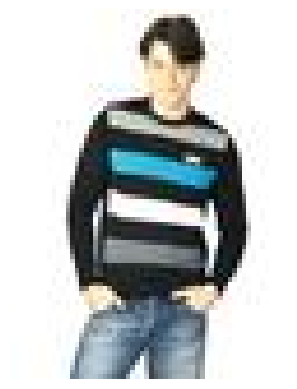

Recommended similar products:
C:\Users\Jiya Sharma\Dropbox\PC\Downloads\fashion\myntradataset\images\13812.jpg
C:\Users\Jiya Sharma\Dropbox\PC\Downloads\fashion\myntradataset\images\10857.jpg
C:\Users\Jiya Sharma\Dropbox\PC\Downloads\fashion\myntradataset\images\12052.jpg
C:\Users\Jiya Sharma\Dropbox\PC\Downloads\fashion\myntradataset\images\13799.jpg
C:\Users\Jiya Sharma\Dropbox\PC\Downloads\fashion\myntradataset\images\13106.jpg


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(input_img_path)
plt.imshow(img)
plt.axis('off')
plt.show()
print("Recommended similar products:")
for img_path in similar_products:
    print(img_path)

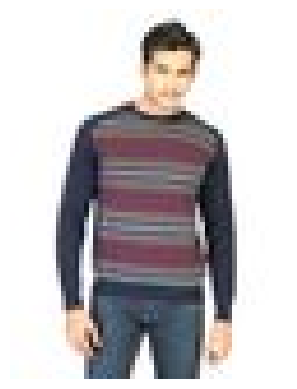

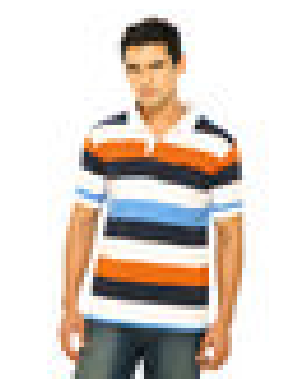

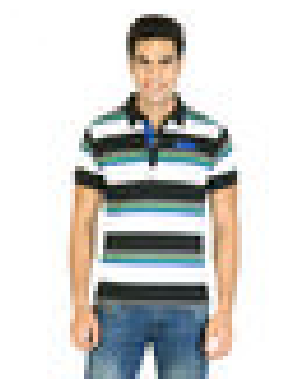

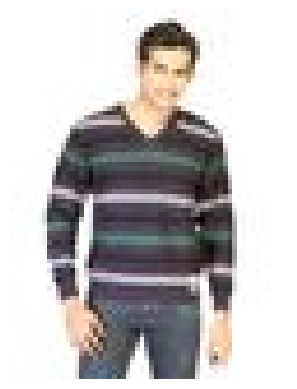

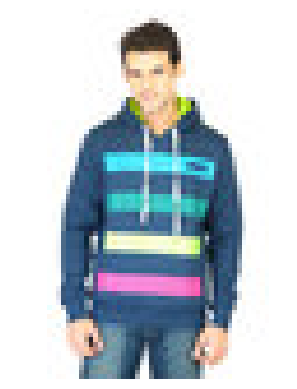

In [ ]:
for img_path in similar_products:
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
